# Árvores de Decisão

- Escolher uma base de dados para análise.
- Fazer classificação dos dados utilizando árvore de decisão.
- Faça análise de desempenho da solução:
 - métricas de desempenho (acurácia, recall, ROC, …) 
 - critério (Gini, Entropia, ...)
 - técnicas de treinamento (validação cruzada, …)
- Apresente os resultados com conclusões em 5 minutos.


## Treinamento

In [66]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import datasets

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 10}
0.9378531073446328
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.95      0.92      0.94        90

   micro avg       0.92      0.92      0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



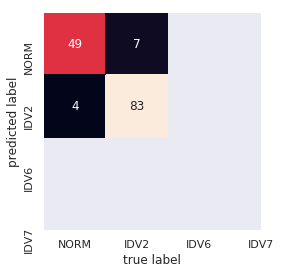

In [73]:
# Load data
data = datasets.load_breast_cancer()
target_names = ['NORM', 'IDV2', 'IDV6', 'IDV7']

# Cross Validation
model = DecisionTreeClassifier()

steps = [
#   Prepocessing
##  Calculate slopes
#   ('slope', estimate_slopes),
##  Feature Selection
#   ('feat_sel', feat_sel),
    ('decision_tree', model)
]
pipe = Pipeline(steps)

pipe_params = {
#     'slope__n': range(3, 21), # 2 < n <= 20, equivalente a 12 minutos
    'decision_tree__max_depth': range(1, 11),
    'decision_tree__criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(pipe, param_grid=pipe_params, cv=10, scoring='f1')
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
y_pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');